<a href="https://colab.research.google.com/github/Sp-supriya/HCDS-Projects/blob/main/Project_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Manufacturing Process Efficiency Analyzer**

In [ ]:
!pip install pandas matplotlib seaborn plotly


In [ ]:
import pandas as pd

# Sample data creation
data = {
    'Machine_ID': [1, 2, 3, 4, 5],
    'Machine_Name': ['Machine A', 'Machine B', 'Machine C', 'Machine D', 'Machine E'],
    'Shift': ['Morning', 'Morning', 'Evening', 'Evening', 'Morning'],
    'Start_Time': ['2023-05-01 08:00', '2023-05-01 08:30', '2023-05-01 16:00', '2023-05-01 16:30', '2023-05-01 08:45'],
    'End_Time': ['2023-05-01 14:00', '2023-05-01 14:30', '2023-05-01 22:00', '2023-05-01 22:30', '2023-05-01 15:00'],
    'Downtime': [1, 0.5, 2, 1.5, 0.8],  # hours of downtime
    'Production_Output': [200, 250, 180, 220, 210],
    'Cycle_Time': [0.3, 0.4, 0.35, 0.38, 0.36],  # hours per unit
    'Resource_Utilization': [85, 90, 80, 88, 92]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as CSV
df.to_csv('/content/manufacturing_data.csv', index=False)


# Load the CSV file
df = pd.read_csv('/content/manufacturing_data.csv')

# Show the first few rows
df.head()


,Machine_ID,Machine_Name,Shift,Start_Time,End_Time,Downtime,Production_Output,Cycle_Time,Resource_Utilization
0,1,Machine A,Morning,2023-05-01 08:00,2023-05-01 14:00,1.0,200,0.30,85
1,2,Machine B,Morning,2023-05-01 08:30,2023-05-01 14:30,0.5,250,0.40,90
2,3,Machine C,Evening,2023-05-01 16:00,2023-05-01 22:00,2.0,180,0.35,80
3,4,Machine D,Evening,2023-05-01 16:30,2023-05-01 22:30,1.5,220,0.38,88
4,5,Machine E,Morning,2023-05-01 08:45,2023-05-01 15:00,0.8,210,0.36,92


In [ ]:
# Calculate additional metrics
df['Total_Production_Time'] = pd.to_datetime(df['End_Time']) - pd.to_datetime(df['Start_Time'])
df['Total_Production_Time'] = df['Total_Production_Time'].dt.total_seconds() / 3600  # Convert to hours

df['Machine_Efficiency'] = (df['Production_Output'] / df['Total_Production_Time']) * 100  # Output per hour
df['Downtime_Ratio'] = df['Downtime'] / df['Total_Production_Time'] * 100  # Downtime as percentage of total time

# Preview the updated DataFrame
df.head()


,Machine_ID,Machine_Name,Shift,Start_Time,End_Time,Downtime,Production_Output,Cycle_Time,Resource_Utilization,Total_Production_Time,Machine_Efficiency,Downtime_Ratio
0,1,Machine A,Morning,2023-05-01 08:00,2023-05-01 14:00,1.0,200,0.30,85,6.00,3333.333333,16.666667
1,2,Machine B,Morning,2023-05-01 08:30,2023-05-01 14:30,0.5,250,0.40,90,6.00,4166.666667,8.333333
2,3,Machine C,Evening,2023-05-01 16:00,2023-05-01 22:00,2.0,180,0.35,80,6.00,3000.000000,33.333333
3,4,Machine D,Evening,2023-05-01 16:30,2023-05-01 22:30,1.5,220,0.38,88,6.00,3666.666667,25.000000
4,5,Machine E,Morning,2023-05-01 08:45,2023-05-01 15:00,0.8,210,0.36,92,6.25,3360.000000,12.800000


<ipython-input-4-076ae224f466>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Machine_Name', y='Machine_Efficiency', data=df, palette='Blues_d')


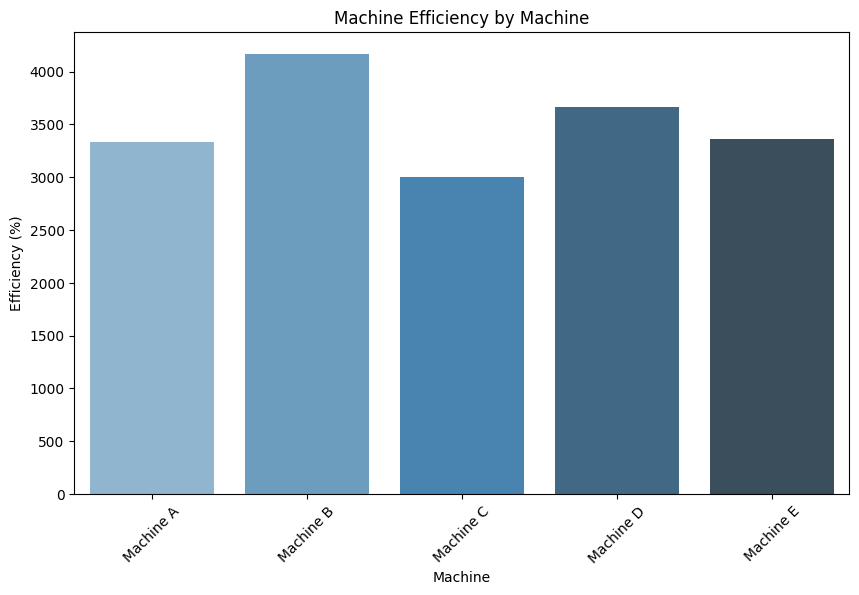

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Machine_Name', y='Machine_Efficiency', data=df, palette='Blues_d')
plt.title('Machine Efficiency by Machine')
plt.xlabel('Machine')
plt.ylabel('Efficiency (%)')
plt.xticks(rotation=45)
plt.show()


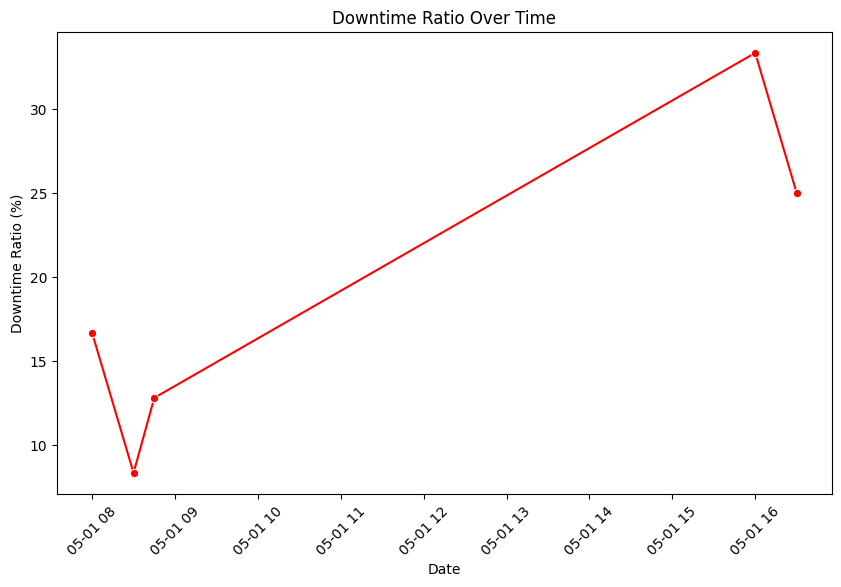

In [ ]:
# Convert 'Start_Time' to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Set up the visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Start_Time', y='Downtime_Ratio', data=df, marker='o', color='red')
plt.title('Downtime Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Downtime Ratio (%)')
plt.xticks(rotation=45)
plt.show()


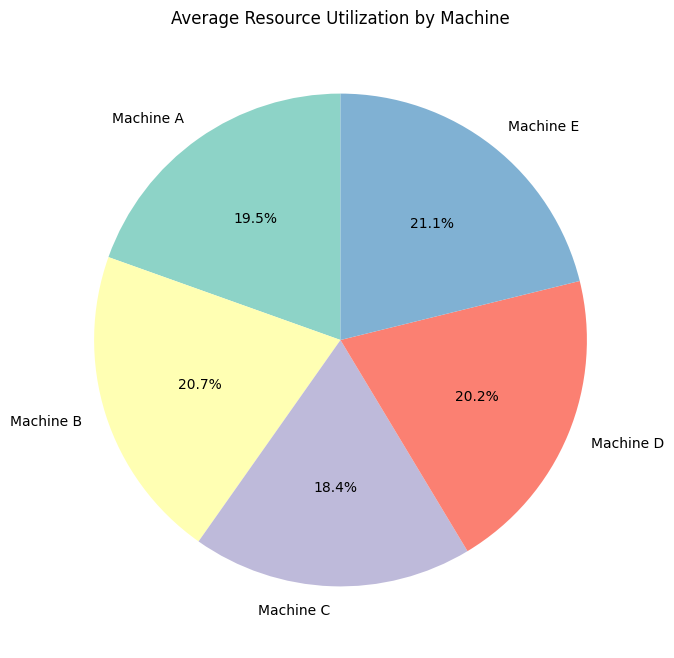

In [ ]:
# Plot Pie Chart for Resource Utilization
machine_utilization = df.groupby('Machine_Name')['Resource_Utilization'].mean()
plt.figure(figsize=(8, 8))
machine_utilization.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(machine_utilization)))
plt.title('Average Resource Utilization by Machine')
plt.ylabel('')
plt.show()


In [ ]:
# Save the updated dataframe with KPIs to CSV
df.to_csv('/content/manufacturing_data_with_kpis.csv', index=False)


In [ ]:
from google.colab import files
files.download('/content/manufacturing_data_with_kpis.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>